In [2]:
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression, LinearRegression
import random
import scipy.stats as stats
import matplotlib.colors as mcolors

random.seed(1249012780)

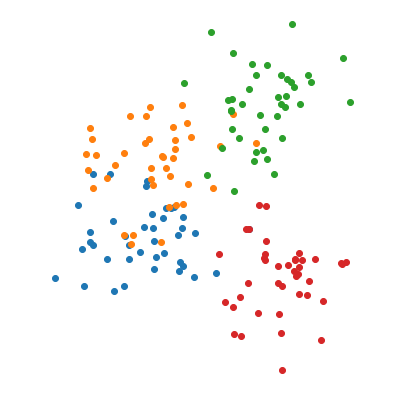

In [3]:
mu1 = np.array([1,2])
Sigma1 = 1.5*np.array([[1,0],[0,1]])

mu2 = np.array([1,5])
Sigma2 = 1.5*np.array([[1,0],[0,1]])

mu3 = np.array([5,7])
Sigma3 = 1.5*np.array([[1,0],[0,1]])

mu4 = np.array([6,1])
Sigma4 = 1.5*np.array([[1,0],[0,1]])

N = 40
X1 = np.random.multivariate_normal(mu1, Sigma1, N)
X2 = np.random.multivariate_normal(mu2, Sigma2, N)
X3 = np.random.multivariate_normal(mu3, Sigma3, N)
X4 = np.random.multivariate_normal(mu4, Sigma4, N)


fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(X1[:,0],X1[:,1],marker='o', label='1')
plt.scatter(X2[:,0],X2[:,1],marker='o', label='2')
plt.scatter(X3[:,0],X3[:,1],marker='o', label='3')
plt.scatter(X4[:,0],X4[:,1],marker='o', label='4')
plt.axis('equal')
# plt.legend(fontsize=20)

ax.axis("off")

a = plt.axis()

# One vs rest

In [4]:
X = np.vstack((X1,X2,X3,X4))

y = np.ones(4*N)
y[:40] = 0
logreg1 = LogisticRegression(random_state=0).fit(X, y)

y = np.ones(4*N)
y[40:80] = 0
logreg2 = LogisticRegression(random_state=0).fit(X, y)

y = np.ones(4*N)
y[80:120] = 0
logreg3 = LogisticRegression(random_state=0).fit(X, y)

y = np.ones(4*N)
y[120:] = 0
logreg4 = LogisticRegression(random_state=0).fit(X, y)

(-2.6622787199265847,
 8.759863165231266,
 -3.0821059359942695,
 10.35133613059244)

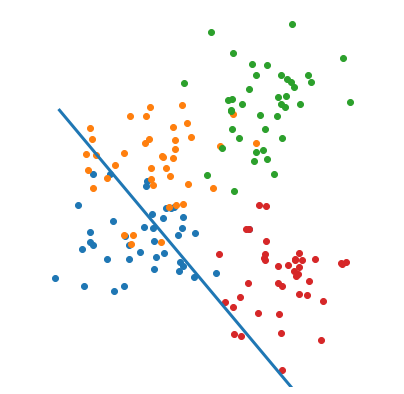

In [5]:
beta0 = logreg1.intercept_[0]
beta1, beta2 = logreg1.coef_[0]

x = np.linspace(-2,8)
y = -(beta0 + beta1*x) / beta2

fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(X1[:,0],X1[:,1],marker='o', label='1')
plt.scatter(X2[:,0],X2[:,1],marker='o', label='2')
plt.scatter(X3[:,0],X3[:,1],marker='o', label='3')
plt.scatter(X4[:,0],X4[:,1],marker='o', label='4')
plt.plot(x,y, linewidth=3)
plt.axis('equal')
ax.axis("off")

plt.axis(a)

(-2.6622787199265847,
 8.759863165231266,
 -3.0821059359942695,
 10.35133613059244)

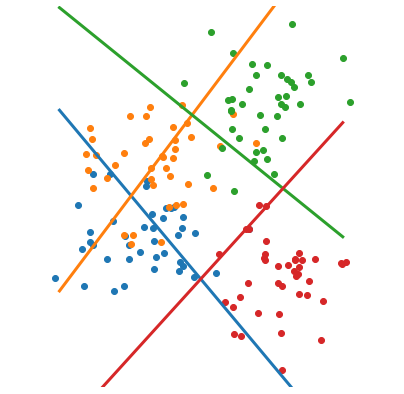

In [6]:
x = np.linspace(-2,8)

fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(X1[:,0],X1[:,1],marker='o', label='1')
plt.scatter(X2[:,0],X2[:,1],marker='o', label='2')
plt.scatter(X3[:,0],X3[:,1],marker='o', label='3')
plt.scatter(X4[:,0],X4[:,1],marker='o', label='4')

beta0 = logreg1.intercept_[0]
beta1, beta2 = logreg1.coef_[0]
y = -(beta0 + beta1*x) / beta2
plt.plot(x,y, linewidth=3)

beta0 = logreg2.intercept_[0]
beta1, beta2 = logreg2.coef_[0]
y = -(beta0 + beta1*x) / beta2
plt.plot(x,y, linewidth=3)

beta0 = logreg3.intercept_[0]
beta1, beta2 = logreg3.coef_[0]
y = -(beta0 + beta1*x) / beta2
plt.plot(x,y, linewidth=3)

beta0 = logreg4.intercept_[0]
beta1, beta2 = logreg4.coef_[0]
y = -(beta0 + beta1*x) / beta2
plt.plot(x,y, linewidth=3)

plt.axis('equal')
ax.axis("off")

plt.axis(a)

# One-vs-One

In [7]:
y = np.ones(2*N)
y[:N] = 0

In [8]:
# mu1 = np.array([1,2])
# Sigma1 = 1.5*np.array([[1,0],[0,1]])

# mu2 = np.array([1,5])
# Sigma2 = 1.5*np.array([[1,0],[0,1]])

# mu3 = np.array([5,7])
# Sigma3 = 1.5*np.array([[1,0],[0,1]])

XX1 = np.random.multivariate_normal(mu1, Sigma1, N)
XX2 = np.random.multivariate_normal(mu2, Sigma2, N)
XX3 = np.random.multivariate_normal(mu3, 2*Sigma3, N)


In [31]:
X = np.vstack((XX1,XX2))
logreg12 = LogisticRegression(random_state=0).fit(X, y)

X = np.vstack((X1,X3))
logreg13 = LogisticRegression(random_state=0).fit(X, y)

X = np.vstack((X1,X4))
logreg14 = LogisticRegression(random_state=0).fit(X, y)

X = np.vstack((X2,X3))
logreg23 = LogisticRegression(random_state=0).fit(X, y)

X = np.vstack((X2,X4))
logreg24 = LogisticRegression(random_state=0).fit(X, y)

X = np.vstack((X3,X4))
logreg34 = LogisticRegression(random_state=0).fit(X, y)

(-1.1370880713080422,
 8.899639678323668,
 -1.9633134624658664,
 10.26344323281998)

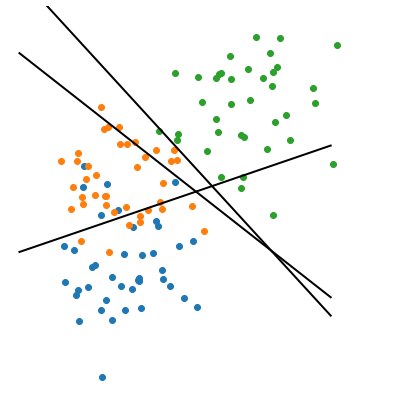

In [39]:
x = np.linspace(-2,8)

fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(X1[:,0],XX1[:,1],marker='o', label='1')
plt.scatter(X2[:,0],XX2[:,1],marker='o', label='2')
plt.scatter(X3[:,0],XX3[:,1],marker='o', label='3')

beta0 = logreg12.intercept_[0]
beta1, beta2 = logreg12.coef_[0]
y = -(beta0 + beta1*x) / beta2
plt.plot(x,y, linewidth=2, color='k')

beta0 = logreg13.intercept_[0]
beta1, beta2 = logreg13.coef_[0]
y = -(beta0 + beta1*x) / beta2
plt.plot(x,y, linewidth=2, color='k')


beta0 = logreg23.intercept_[0]
beta1, beta2 = logreg23.coef_[0]
y = -(beta0 + beta1*x) / beta2
plt.plot(x,y, linewidth=2, color='k')

# plt.legend(fontsize=20)
plt.axis('equal')
ax.axis("off")

plt.axis(a)